# Getting Started with Facebook Prophet in Python

## Step 1: Setting Up Your Environment for Facebook Prophet


In [ ]:
# Install necessary packages
# pip install pandas matplotlib prophet

# Import required libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Set style for better visualizations
plt.style.use('ggplot')

## Step 2: Loading and Preparing Your Dataset



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11509  100 11509    0     0  24729      0 --:--:-- --:--:-- --:--:-- 24729
Archive:  ./retail-sales-dataset.zip
  inflating: retail_sales_dataset.csv  
Dataset Overview:
        Date  Total Amount
0 2023-01-01          3600
1 2023-01-02          1765
2 2023-01-03           600
3 2023-01-04          1240
4 2023-01-05          1100

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          345 non-null    datetime64[ns]
 1   Total Amount  345 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.5 KB
None

Missing values count:
ds    0
y     0


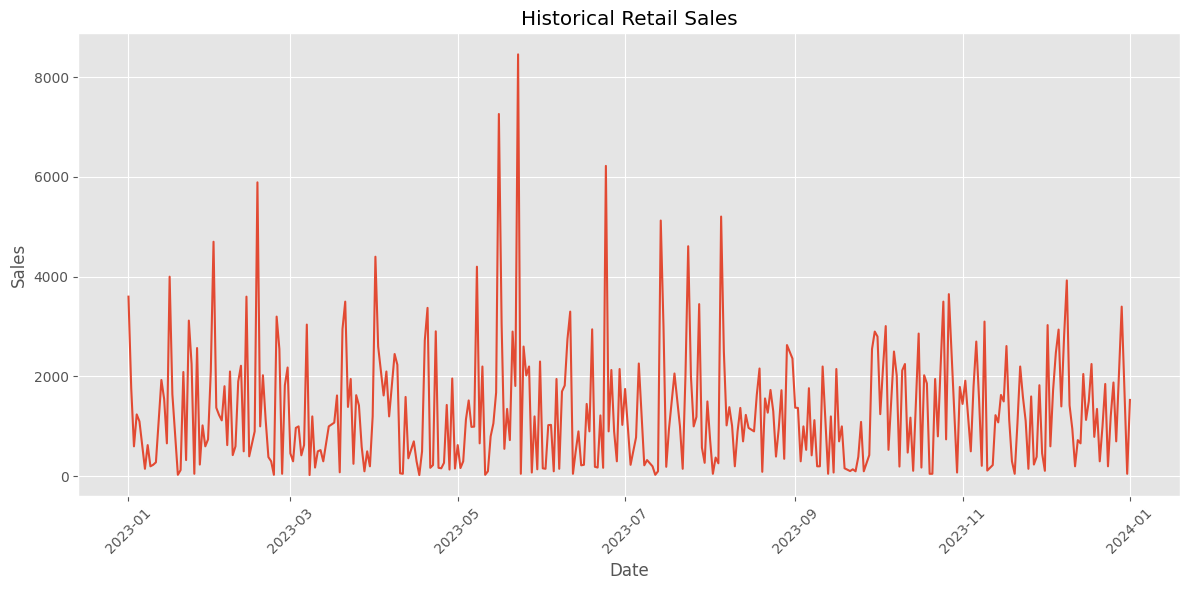

In [ ]:
!curl -L -o ./retail-sales-dataset.zip \
  https://www.kaggle.com/api/v1/datasets/download/mohammadtalib786/retail-sales-dataset

# After downloading, unzip the file
!unzip -o ./retail-sales-dataset.zip

# Load the retail sales dataset from Kaggle
retail_data = pd.read_csv('retail_sales_dataset.csv')

#clean up the dataset

retail_data = retail_data.sort_values('Date')
retail_data = retail_data.dropna(subset=['Total Amount'])

retail_data = retail_data.groupby('Date')['Total Amount'].sum().reset_index()

# Convert 'Date' column to datetime and set as index
retail_data['Date'] = pd.to_datetime(retail_data['Date'])

# retail_data = retail_data.set_index('Date')

# Examine the data structure
print("Dataset Overview:")
print(retail_data.head())
print("\nDataset Information:")
print(retail_data.info())

# Basic data preparation - ensure date column is properly formatted
# Assuming the dataset has 'Date' and 'Sales' columns
retail_data.rename(columns={'Date': 'ds', 'Total Amount': 'y'}, inplace=True)
retail_data['ds'] = pd.to_datetime(retail_data['ds'])

# Check for and handle missing values
print("\nMissing values count:")
print(retail_data.isnull().sum())
# print(retail_data.head())

# If there are missing values in the 'y' column, handle them
if retail_data['y'].isnull().sum() > 0:
    print("\nFilling missing sales values with forward fill method")
    retail_data['y'] = retail_data['y'].fillna(method='ffill')

# Display prepared data
print("\nPrepared data for Prophet:")
print(retail_data.head())

# Visualize the historical sales data
plt.figure(figsize=(12, 6))
plt.plot(retail_data['ds'], retail_data['y'])
plt.title('Historical Retail Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step 3: Fitting a Facebook Prophet Model


In [ ]:
# Create a Prophet model
model = Prophet(
    yearly_seasonality=True,  # Capture yearly patterns
    weekly_seasonality=True,  # Capture weekly patterns
    daily_seasonality=False,  # Usually not needed for retail data
    seasonality_mode='multiplicative'  # Better for retail data that shows increasing seasonality
)

# Add holidays if relevant (example for US holidays)
# model.add_country_holidays(country_name='US')

# Fit the model to our data
print("Fitting the Prophet model...")
model.fit(retail_data)
print("Model fitting complete!")

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7jjgugxg/md735zbv.json


Fitting the Prophet model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7jjgugxg/euq39jnw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57304', 'data', 'file=/tmp/tmp7jjgugxg/md735zbv.json', 'init=/tmp/tmp7jjgugxg/euq39jnw.json', 'output', 'file=/tmp/tmp7jjgugxg/prophet_modeld19jups7/prophet_model-20250514185514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:55:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:55:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model fitting complete!


# Why Facebook Prophet Makes Forecasting Easy (and Powerful)

## Step 1: Making and Visualizing Forecasts


Generating forecasts...

Forecast Overview:
            ds        yhat  yhat_lower   yhat_upper
520 2024-06-25  824.771935 -555.340071  2267.331399
521 2024-06-26  708.766589 -710.080598  2202.749671
522 2024-06-27  599.903772 -881.662265  2059.250845
523 2024-06-28  772.209364 -748.802911  2143.508276
524 2024-06-29  932.491051 -508.899040  2392.986269


<Figure size 1200x600 with 0 Axes>

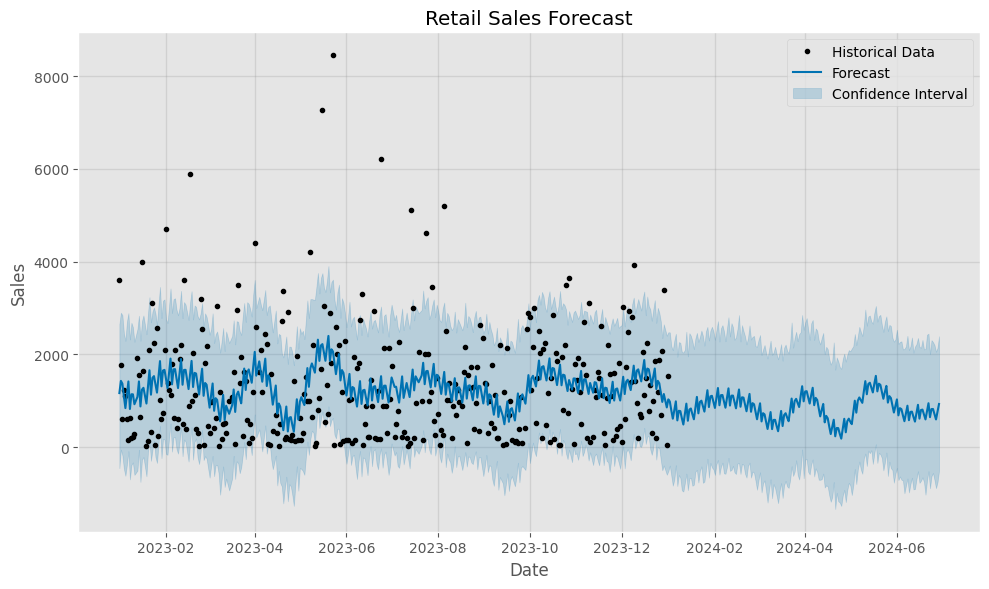

In [ ]:
# Create future dates dataframe (forecasting 6 months ahead)
future = model.make_future_dataframe(periods=180)

# If your data is daily but you don't want to forecast on certain days (e.g., weekends)
# future['day'] = future['ds'].dt.dayofweek
# future = future[future['day'] < 5].drop('day', axis=1)  # Only weekdays

# Generate forecasts
print("Generating forecasts...")
forecast = model.predict(future)

# Display forecast results
print("\nForecast Overview:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot the forecast
plt.figure(figsize=(12, 6))
fig = model.plot(forecast)
plt.title('Retail Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(['Historical Data', 'Forecast', 'Confidence Interval'])
plt.tight_layout()
plt.show()

## Step 2: Analyzing Components of the Forecast

<Figure size 1200x1000 with 0 Axes>

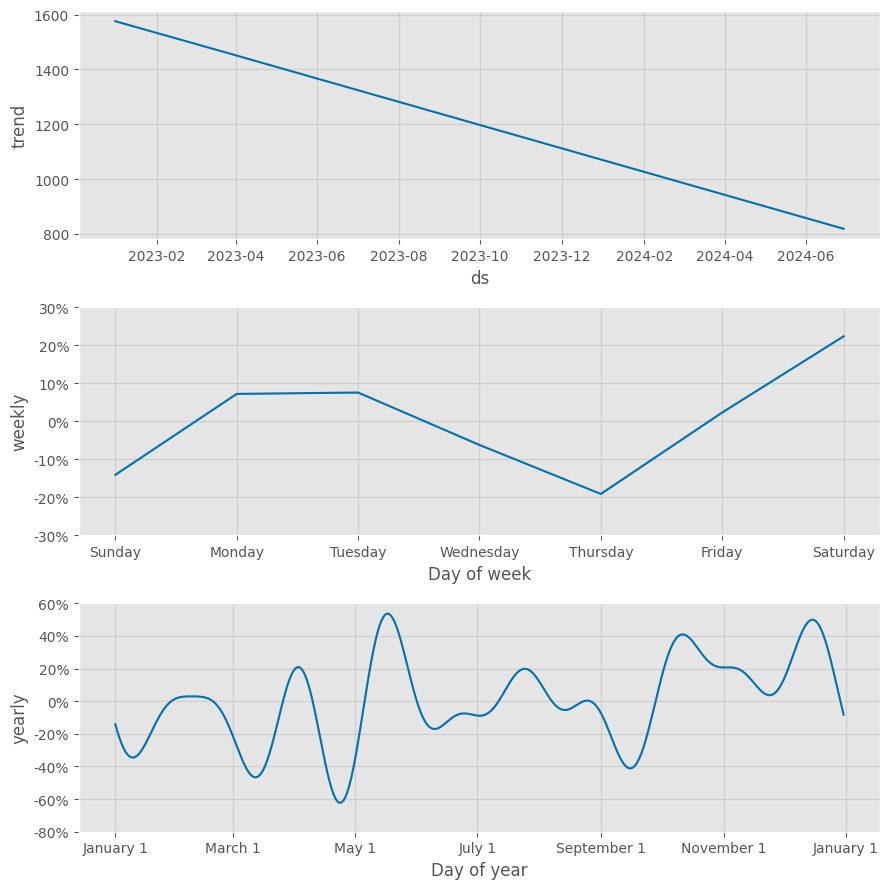

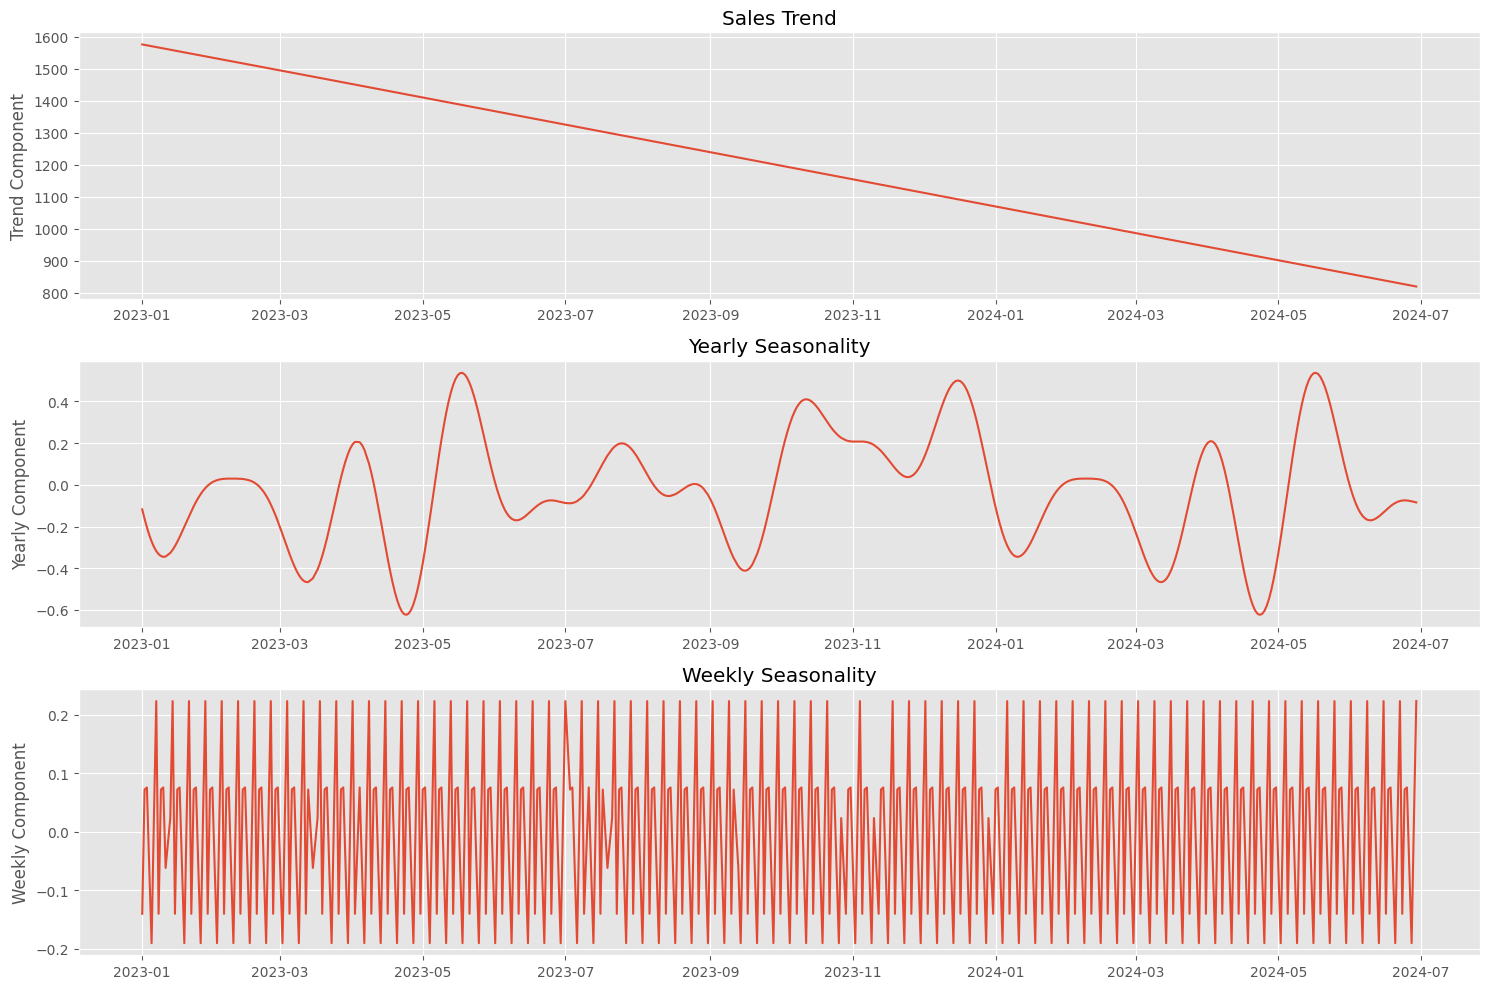

In [ ]:
# Plot the components of the forecast
plt.figure(figsize=(12, 10))
fig = model.plot_components(forecast)
plt.tight_layout()
plt.show()

# Extract and visualize specific components
trends = forecast[['ds', 'trend']].set_index('ds')
yearly = forecast[['ds', 'yearly']].set_index('ds')
weekly = forecast[['ds', 'weekly']].set_index('ds')

plt.figure(figsize=(15, 10))

# Plot trend
plt.subplot(3, 1, 1)
plt.plot(trends)
plt.title('Sales Trend')
plt.ylabel('Trend Component')

# Plot yearly seasonality
plt.subplot(3, 1, 2)
plt.plot(yearly)
plt.title('Yearly Seasonality')
plt.ylabel('Yearly Component')

# Plot weekly seasonality
plt.subplot(3, 1, 3)
plt.plot(weekly)
plt.title('Weekly Seasonality')
plt.ylabel('Weekly Component')

plt.tight_layout()
plt.show()

## Step 3: Evaluating Forecast Performance


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7jjgugxg/fzf74rbj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7jjgugxg/sfebvuow.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4759', 'data', 'file=/tmp/tmp7jjgugxg/fzf74rbj.json', 'init=/tmp/tmp7jjgugxg/sfebvuow.json', 'output', 'file=/tmp/tmp7jjgugxg/prophet_modelq6dolnfp/prophet_model-20250514190119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:01:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:01:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Starting model evaluation...
Training data rows: 276, Test data rows: 69
Test data period: 2023-10-22 00:00:00 to 2024-01-01 00:00:00
Fitting evaluation model on training data...
Evaluation model fitting complete.
Making predictions for 69 dates in the test period...
Predictions for test period generated.

Number of rows in merged 'predictions' DataFrame: 69
'predictions' DataFrame head:
           ds     y        yhat  yhat_lower   yhat_upper
0 2023-10-22  1950  766.019453 -744.617577  2358.115629
1 2023-10-23   800  925.016189 -677.684230  2425.000615
2 2023-10-24  2200  853.815578 -644.605398  2419.117687
3 2023-10-25  3500  611.461897 -916.291452  2152.187191
4 2023-10-26   740  496.816129 -973.924499  2017.384480

Mean Absolute Error (MAE): 895.70
Mean Absolute Percentage Error (MAPE): 148.94%
Forecast Accuracy (100-MAPE): -48.94%


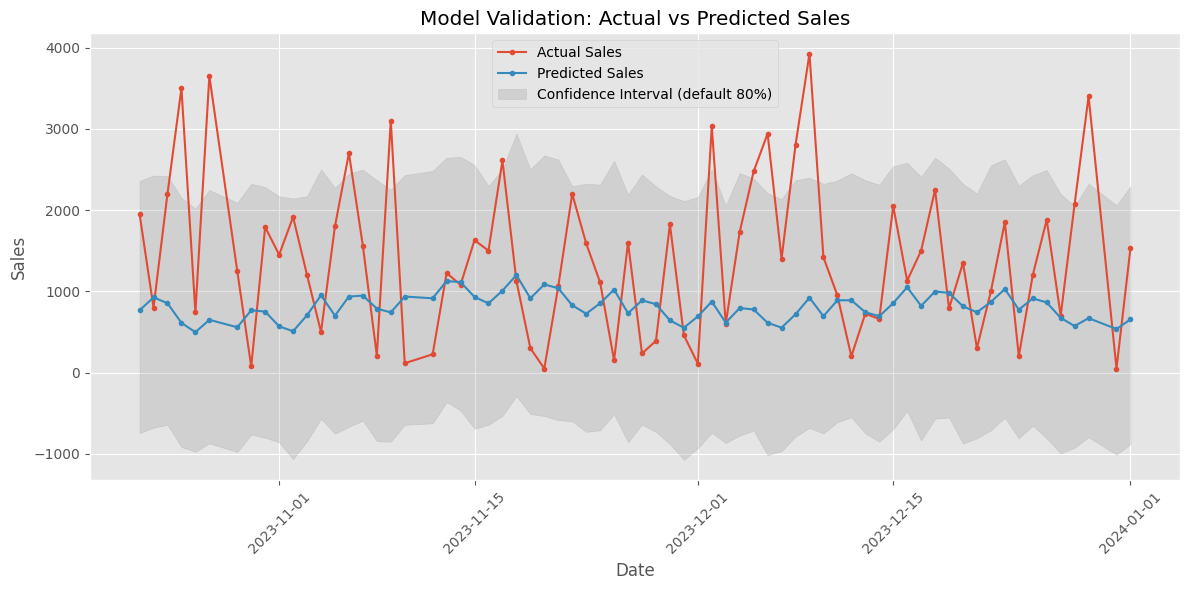

In [ ]:
print("\nStarting model evaluation...")
# Split data for evaluation
# Ensure retail_data has 'ds' and 'y' columns and 'ds' is datetime
if not all(col in retail_data.columns for col in ['ds', 'y']):
    raise ValueError("retail_data DataFrame must contain 'ds' and 'y' columns.")
if not pd.api.types.is_datetime64_any_dtype(retail_data['ds']):
    raise ValueError("'ds' column in retail_data must be of datetime type.")

train_size = int(len(retail_data) * 0.8)
train_data = retail_data.iloc[:train_size]
test_data = retail_data.iloc[train_size:]

print(f"Training data rows: {len(train_data)}, Test data rows: {len(test_data)}")

if len(test_data) == 0:
    print("Warning: Test data is empty. Check train/test split logic and dataset size. Cannot proceed with evaluation.")
else:
    print(f"Test data period: {test_data['ds'].min()} to {test_data['ds'].max()}")

    # Fit model on training data
    eval_model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False, # Match the main model's daily_seasonality setting
        seasonality_mode='multiplicative' # Match the main model's seasonality_mode
    )
    # If you added holidays to the main 'model', add them to 'eval_model' too:
    # eval_model.add_country_holidays(country_name='US') # Example

    print("Fitting evaluation model on training data...")
    eval_model.fit(train_data)
    print("Evaluation model fitting complete.")

    # Create a DataFrame with the actual dates from the test set for prediction.
    # This DataFrame must contain a 'ds' column with the dates for which you want forecasts.
    future_test_dates_df = test_data[['ds']].copy()

    print(f"Making predictions for {len(future_test_dates_df)} dates in the test period...")
    # Generate predictions for the test period dates using the evaluation model
    test_forecast_output = eval_model.predict(future_test_dates_df)
    print("Predictions for test period generated.")

    # Merge the predictions (which include 'ds', 'yhat', 'yhat_lower', 'yhat_upper')
    # with the actual values from test_data (which include 'ds', 'y').
    # The 'ds' columns in both DataFrames now correspond to the same set of dates (the test period).
    predictions = pd.merge(
        test_data[['ds', 'y']],  # Actual values from the test set
        test_forecast_output[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],  # Predicted values
        on='ds',  # Merge on the date column
        how='inner' # Use 'inner' to ensure only matching dates are included
    )

    print(f"\nNumber of rows in merged 'predictions' DataFrame: {len(predictions)}")

    if len(predictions) == 0:
        print("ERROR: The 'predictions' DataFrame is empty after merging. This means there was no overlap in 'ds' dates.")
        if not test_data.empty and not test_forecast_output.empty:
            print("Sample 'ds' from test_data:\n", test_data['ds'].head())
            print("Sample 'ds' from test_forecast_output:\n", test_forecast_output['ds'].head())
    else:
        print("'predictions' DataFrame head:\n", predictions.head())

        # Calculate metrics
        actual_y = predictions['y']
        predicted_yhat = predictions['yhat']

        mae = np.mean(np.abs(actual_y - predicted_yhat))

        # Robust MAPE calculation (handles cases where actual_y can be 0)
        # Filter out rows where actual_y is 0 to avoid division by zero errors for MAPE.
        non_zero_actual_y_mask = (actual_y != 0)

        if np.sum(non_zero_actual_y_mask) == 0: # If all actual_y in test set (for which predictions exist) are zero
            mape = np.nan # Or some other indicator like float('inf') or a warning message
            print("Warning: All 'y' values in the test set (with corresponding predictions) are zero. MAPE cannot be meaningfully calculated.")
        else:
            mape = np.mean(np.abs((actual_y[non_zero_actual_y_mask] - predicted_yhat[non_zero_actual_y_mask]) / actual_y[non_zero_actual_y_mask])) * 100

        accuracy = 100 - mape

        print(f"\nMean Absolute Error (MAE): {mae:.2f}")
        print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%") # Will show nan if mape is nan
        print(f"Forecast Accuracy (100-MAPE): {accuracy:.2f}%") # Will also reflect nan if mape is nan

        # Plot actual vs predicted
        plt.figure(figsize=(12, 6))
        plt.plot(predictions['ds'], predictions['y'], label='Actual Sales', marker='.', linestyle='-')
        plt.plot(predictions['ds'], predictions['yhat'], label='Predicted Sales', marker='.', linestyle='-')
        plt.fill_between(predictions['ds'], predictions['yhat_lower'], predictions['yhat_upper'],
                         color='gray', alpha=0.2, label='Confidence Interval (default 80%)') # Prophet default is 80% CI
        plt.title('Model Validation: Actual vs Predicted Sales')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()